# Random Forest x IRIS 

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importer le dataset IRIS 

In [2]:
data_url = "../../../../dataset/datasets_dallard/iris.csv"
iris_df = pd.read_csv(data_url)
iris_df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Faite un dataFrame et renommer les colonnes 

In [3]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
print(tuple(iris_df["species"].unique()))

('setosa', 'versicolor', 'virginica')


In [7]:
iris = iris_df.rename(columns={'sepal_length': 'sepa length', 'sepal_width':'sepal width', 'petal_length': 'petal length', 'petal_width':'petal width' })


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepa length   150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# on crée un label
label_encoder = LabelEncoder()

In [10]:
# on labellise la colonne species
species_label_encoder = LabelEncoder()
iris.species = species_label_encoder.fit_transform(iris.species)
iris.head(10)

,sepa length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [11]:
#change le type de la variable species en int
iris[["species"]] = iris[["species"]].apply(pd.to_numeric)

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepa length   150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
iris.astype({'species': 'int64'}).dtypes
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepa length   150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Définir les variables features et la target & effectuer un split 

In [13]:
#on definit nos features et notre target
features = ['sepa length', 'sepal width', 'petal length',
            'petal width']
target = ['species']
X = iris[features].values.astype('float')
y = iris[target].values.astype('float')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 1), (45, 1))

In [16]:
print(type(x_train))
x_train[:10]

<class 'numpy.ndarray'>


array([[7. , 3.2, 4.7, 1.4],
       [4.6, 3.2, 1.4, 0.2],
       [6. , 2.2, 5. , 1.5],
       [7.7, 3.8, 6.7, 2.2],
       [5.9, 3.2, 4.8, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [4.8, 3.4, 1.6, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [4.9, 3.1, 1.5, 0.1]])

In [17]:
print(type(x_test))
x_test[:5]

<class 'numpy.ndarray'>


array([[4.8, 3.4, 1.9, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [5.5, 3.5, 1.3, 0.2]])

l'échantilon de départ à été splitté (réduit) en deux échantillon un pour le test et un pour l'entrainemennt


### Entrainer le classifieur

In [18]:
rf = RandomForestRegressor(random_state = 42, oob_score = True)
#affichage des parametres par defaut 
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [19]:
model = rf.fit(x_train, y_train.ravel())
print(model)

RandomForestRegressor(oob_score=True, random_state=42)


### Afficher l'accuracy de votre classifieurs 

In [20]:
model.score(x_test,y_test)

0.94086743772242

### Analyser votre classifieur, que voyez vous ? 

Avec un estimateurs à 100 et un ramdom state à 42 on obtient une précision de 98 % pour notre classifieur.

### Afficher les features importances

In [21]:
feature_important = pd.Series(rf.feature_importances_,index=features).sort_values(ascending=False)
feature_important

petal length    0.534703
petal width     0.450207
sepal width     0.009808
sepa length     0.005282
dtype: float64

Les résultats nous montrent que les caractères sepal_width et sepal_length sont quasi insignifiantes pour prevoir classification d'un individu à un groupe, on pourrait s'en passer pour notre classification

### Afficher graphiquement les features importances  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


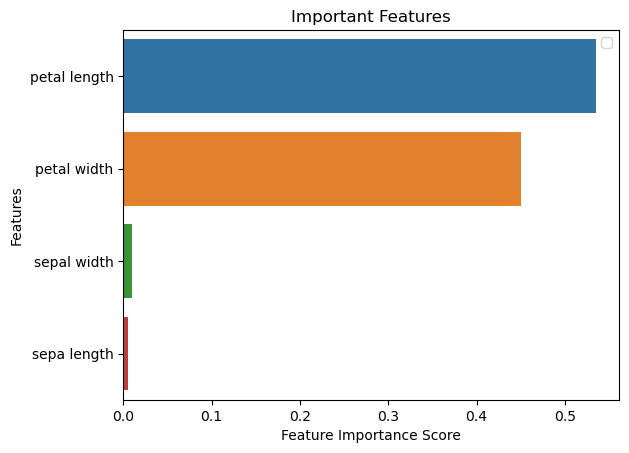

In [22]:
# Creating a bar plot
sns.barplot(x=feature_important, y=feature_important.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()

### Entrainer votre classifieurs avec moins de features

Nous supprimons la variable sepal_width dans un premier temps.

In [23]:
features2 = ['sepa length', 'petal length', 'petal width']
target = ['species']
X = iris[features2].values.astype('float')
y = iris[target].values.astype('float')

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 3), (45, 3), (105, 1), (45, 1))

In [26]:
rf2 = RandomForestRegressor(random_state = 42, oob_score = True)
#affichage des parametres par defaut 
print('Parameters currently in use:\n')
pprint(rf2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [27]:
model2 = rf2.fit(x_train, y_train.ravel())
print(model)

RandomForestRegressor(oob_score=True, random_state=42)


In [28]:
model2.score(x_test,y_test)

0.9963409090909091

Nous obtenons une précision plus élevé que la précédente  (≈0.997)

In [29]:
feature2_important = pd.Series(rf2.feature_importances_,index=features2).sort_values(ascending=False)
feature2_important

petal length    0.547269
petal width     0.437326
sepa length     0.015405
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


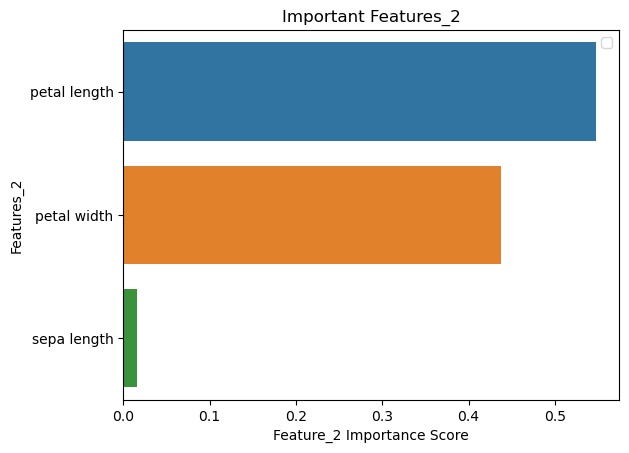

In [30]:
# Creating a bar plot
sns.barplot(x=feature2_important, y=feature2_important.index)

# Add labels to your graph
plt.xlabel('Feature_2 Importance Score')
plt.ylabel('Features_2')
plt.title("Important Features_2")
plt.legend()
plt.show()

In [31]:
features3 = ['petal length', 'petal width']
target = ['species']
X = iris[features3].values.astype('float')
y = iris[target].values.astype('float')

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

rf3 = RandomForestRegressor(random_state = 42, oob_score = True)
#affichage des parametres par defaut 
print('Parameters currently in use:\n')
pprint(rf3.get_params())

model3 = rf3.fit(x_train, y_train.ravel())
print(model3)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
RandomForestRegressor(oob_score=True, random_state=42)


In [33]:
feature3_important = pd.Series(rf3.feature_importances_,index=features3).sort_values(ascending=False)
feature3_important

petal length    0.625114
petal width     0.374886
dtype: float64

In [34]:
model3.score(x_test,y_test)

0.7893708333333334

### Que constatez vous ? 

Apres le retrait d'une de la variable sepal_width la moins importante on constate qu'on a une meilleur accuracy et que le degrée d'importance entre les variables restantes se réduit bien que la variable sepal_length reste insignifiante par rapport aux deux autres.

Après le retrait de la variable sepal_width et sepal_length 
la précision du model est moins bonne, passant de à 0.7893708333333334 cela est peut être dû au fait qu'il n'y a pas assez de variété de critère.

Nous concluons que pour une meilleure classicification il est préférable d'utiliser les 3 variables petale lenght, petale width et sepal length si on utimlise le modele de classification de Ramdomforestregressor avec estimateur à 100 et un random state à 42